<a href="https://colab.research.google.com/github/Kanksha-09/DSBDA/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Housing_df=pd.read_csv("/content/Housing.csv")
Housing_df

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
93,6300000,7200,3,2,yes,no,yes,no,yes,3,no,semi-furnished
94,6300000,6000,4,2,yes,no,no,no,no,1,no,semi-furnished
95,6300000,4100,3,2,yes,no,no,no,yes,2,no,semi-furnished
96,6300000,9000,3,1,yes,no,yes,no,no,1,yes,furnished


In [ ]:
Housing_df.head( 10 )

,price,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             98 non-null     int64 
 1   area              98 non-null     int64 
 2   bedrooms          98 non-null     int64 
 3   bathrooms         98 non-null     int64 
 4   mainroad          98 non-null     object
 5   guestroom         98 non-null     object
 6   basement          98 non-null     object
 7   hotwaterheating   98 non-null     object
 8   airconditioning   98 non-null     object
 9   parking           98 non-null     int64 
 10  prefarea          98 non-null     object
 11  furnishingstatus  98 non-null     object
dtypes: int64(5), object(7)
memory usage: 9.3+ KB


In [ ]:
import statsmodels.api as sm
X = sm.add_constant( Housing_df['area'] )
X.head(5)

,const,area
0,1.0,7420
1,1.0,8960
2,1.0,9960
3,1.0,7500
4,1.0,7420


In [ ]:
Y = Housing_df['price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( X,
Y, train_size = 0.8, random_state = 100 )

In [ ]:
Housing_lm = sm.OLS( train_y, train_X ).fit()

In [ ]:
print( Housing_lm.params )

const    6.769099e+06
area     1.686411e+02
dtype: float64


In [ ]:
Housing_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.049     
Dependent Variable:   price             AIC:                 2442.1864 
Date:                 2025-03-04 06:36  BIC:                 2446.8998 
No. Observations:     78                Log-Likelihood:      -1219.1   
Df Model:             1                 F-statistic:         4.936     
Df Residuals:         76                Prob (F-statistic):  0.0293    
R-squared:            0.061             Scale:               2.2612e+12
-----------------------------------------------------------------------
         Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
-----------------------------------------------------------------------
const 6769098.9655 561503.1310 12.0553 0.0000 5650768.5591 7887429.3718
area      168.6411     75.9050  2.2217 0.0293      17.4632     319.8190
-----------------------------------------------------------------------
Omnibus:                24.643         Durbin-Watson:            1.454 
Prob(Omnibus):          0.000          Jarque-Bera (JB):         35.781
Skew:                   1.346          Prob(JB):                 0.000 
Kurtosis:               4.939          Condition No.:            24396 
=======================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
[2] The condition number is large, 2.44e+04. This might indicate
that there are strong multicollinearity or other numerical
problems.
"""

<Figure size 800x600 with 0 Axes>

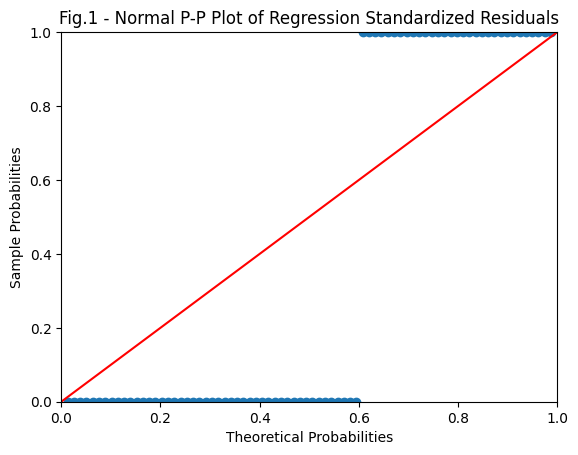

In [ ]:
%matplotlib inline
Housing_resid = Housing_lm.resid
probplot = sm.ProbPlot(Housing_resid)
plt.figure( figsize = (8, 6))
probplot.ppplot(line='45')
plt.title("Fig.1 - Normal P-P Plot of Regression Standardized Residuals")
plt.show()

In [ ]:
np.random.seed(42)

In [ ]:
X = 2 * np.random.rand(100,1)
X

array([[0.22711518],
       [1.34314639],
       [1.0406154 ],
       [1.54463678],
       [1.040327  ],
       [1.704363  ],
       [1.10381368],
       [1.12187594],
       [1.75330721],
       [0.80696573],
       [0.26803046],
       [0.05756535],
       [1.51027451],
       [1.2406191 ],
       [1.40815954],
       [0.42592832],
       [0.27274295],
       [0.02908933],
       [0.70117512],
       [1.17983537],
       [0.78448809],
       [0.87494984],
       [1.80831739],
       [0.69651093],
       [1.02797898],
       [1.56730603],
       [0.79308556],
       [1.2441734 ],
       [1.72472742],
       [1.89904125],
       [0.29414696],
       [1.85317525],
       [0.98423259],
       [0.51648878],
       [0.91827151],
       [1.96006515],
       [0.98523619],
       [0.65750322],
       [1.26680171],
       [0.48029124],
       [0.15172666],
       [0.25775944],
       [0.25609168],
       [0.30380539],
       [0.27765435],
       [1.28174949],
       [0.36376017],
       [0.691

In [ ]:
y = 4 + 3 * X + np.random.randn(100, 1)
y

array([[ 6.36848719],
       [ 8.91107893],
       [ 7.11387356],
       [10.11385449],
       [ 7.19834931],
       [ 8.2518048 ],
       [ 8.83456511],
       [ 7.90453787],
       [ 8.22267546],
       [ 6.23055852],
       [ 3.92847312],
       [ 2.78989633],
       [ 9.45700108],
       [ 9.63127395],
       [ 6.82591103],
       [ 5.84075421],
       [ 4.16758628],
       [ 3.60014261],
       [ 5.51113143],
       [ 6.67551535],
       [ 6.4019859 ],
       [ 5.79389942],
       [ 9.69540899],
       [ 6.03929469],
       [ 6.84498889],
       [ 7.79435441],
       [ 5.80248536],
       [ 8.48791143],
       [ 9.67509944],
       [ 8.7195685 ],
       [ 4.98177319],
       [10.31091287],
       [ 5.28329248],
       [ 6.09282652],
       [ 6.09219078],
       [10.45079412],
       [ 6.19244941],
       [ 4.16762756],
       [ 6.17286269],
       [ 5.48895866],
       [ 4.71490247],
       [ 3.86896171],
       [ 5.40686749],
       [ 3.2498961 ],
       [ 4.76688324],
       [ 6

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[5.40837817],
       [4.17982439],
       [4.2971778 ],
       [7.66399333],
       [4.74865885],
       [5.33700381],
       [9.19285399],
       [6.6283926 ],
       [4.72071642],
       [4.6019212 ],
       [5.97832789],
       [4.79654424],
       [8.28756579],
       [5.44210135],
       [7.03535418],
       [6.96303655],
       [6.09379523],
       [6.75607603],
       [8.32750304],
       [9.3230963 ]])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

1.2162755898404436

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.7088943547588922

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}, Slope: {model.coef_[0][0]:2f}")

Mean Squared Error: 1.22
R² Score: 0.71
Intercept: 3.94, Slope: 2.903444


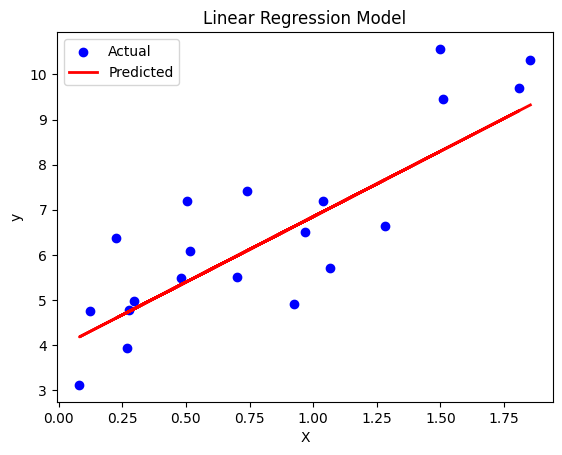

In [ ]:
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Predicted")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Model")
plt.show()